<a href="https://colab.research.google.com/github/SaidaAourras/Detection_Emotions_Faciales/blob/main/Analyse_kagglehub_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

100%|██████████| 65.2M/65.2M [00:00<00:00, 75.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1


In [ ]:
import os
# print(os.listdir(path))

for item in os.listdir(path):
  item_path = os.path.join(path, item)
  if os.path.isdir(item_path):
    print(f'---{item}')
    print(os.listdir(item_path))

---test
['sad', 'fearful', 'happy', 'angry', 'disgusted', 'surprised', 'neutral']
---train
['sad', 'fearful', 'happy', 'angry', 'disgusted', 'surprised', 'neutral']


In [ ]:
import tensorflow as tf
import numpy as np

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

train_data = tf.keras.utils.image_dataset_from_directory(train_path , batch_size=50 ,image_size=(48,48) ,label_mode='categorical',shuffle=True , color_mode='grayscale')
test_data = tf.keras.utils.image_dataset_from_directory(test_path , batch_size=50, image_size=(48,48),shuffle=True ,label_mode='categorical', color_mode='grayscale')

# print(type(train_data)) # tensorflow.python.data.ops.prefetch_op._PrefetchDataset

# for i in train_data:
#   print(type(i)) # tuple
#   print(i[1])
#   break


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [ ]:
print(train_data.class_names)
classes = train_data.class_names
for images , labels in train_data:
  print(images.shape)
  print(labels.shape)
  break

# print(labels)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
(50, 48, 48, 1)
(50, 7)


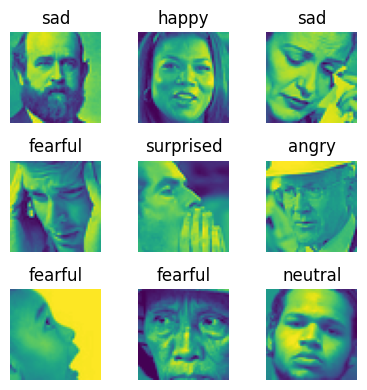

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
images_classes = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
for images , labels in train_data.take(2):
  for i in range(1,10):
    # print(images.shape)
    # print(np.unique(labels))
    image = images[i].numpy().astype('uint8')
    # print(labels[i])
    # print(image)
    plt.subplot(3,3,i)
    plt.imshow(image)
    plt.title(images_classes[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# import cv2
# import tensorflow as tf

# for images, labels in train_data.take(1):
#     for i in range(5):
#         img = images[i].numpy().astype('uint8')
#         img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#         cv2.imshow(f'Image {i}', img_bgr)
#         cv2.waitKey(0)
# cv2.destroyAllWindows()


## Entrainement du CNN

In [39]:
# create a model cnn with flattn & dense
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3) , activation='relu', input_shape=(48,48,1)),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(128 , activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7 , activation='softmax')
])
# optimiser

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

In [43]:
model.fit(train_data , epochs=20 , validation_data = test_data)

Epoch 1/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5317 - loss: 1.2129 - val_accuracy: 0.5022 - val_loss: 1.2807
Epoch 2/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5525 - loss: 1.1737 - val_accuracy: 0.5358 - val_loss: 1.2711
Epoch 3/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5626 - loss: 1.1444 - val_accuracy: 0.5297 - val_loss: 1.2682
Epoch 4/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5834 - loss: 1.0963 - val_accuracy: 0.5371 - val_loss: 1.2546
Epoch 5/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5955 - loss: 1.0639 - val_accuracy: 0.5309 - val_loss: 1.2793
Epoch 6/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6084 - loss: 1.0302 - val_accuracy: 0.5390 - val_loss: 1.3054
Epoch 7/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6238 - loss: 0.9858 - val_accuracy: 0.5407 - val_loss: 1.3128
Epoch 8/20
575/575 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6323 - loss: 0.9596 - val_acc

In [44]:
print(model.evaluate(test_data))

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5362 - loss: 1.7429
[1.7362890243530273, 0.5405405163764954]


In [45]:
model.save('CNN_model.keras')